# Clase 3 - Semana 6
#### Tópicos Selectos De Matemáticas Aplicadas II: Análisis de Datos con Python

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ruta = 'https://raw.githubusercontent.com/jamc88/AD-MCMAI/refs/heads/main/Datos/Corredores.csv'
run = pd.read_csv(ruta)

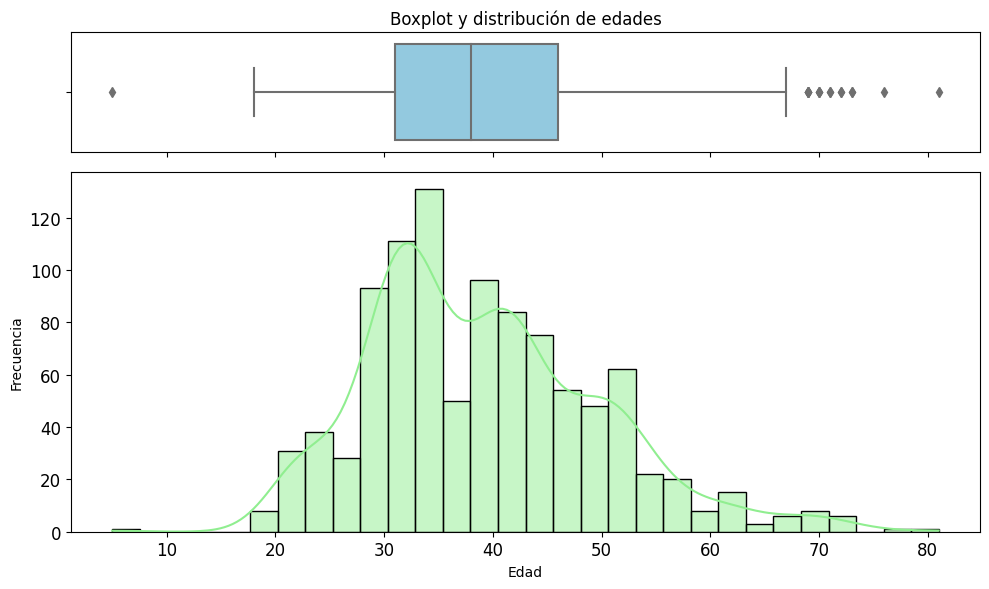

In [3]:
fig, axes = plt.subplots(nrows=2, sharex=True, figsize=(10, 6),
                         height_ratios=[1, 3])

sns.boxplot(data=run, x='Edad', ax=axes[0], color='skyblue')
#axes[0].set_title('Boxplot y distribución de edades')
#axes[0].set(xlabel='')

sns.histplot(data=run, x='Edad', bins=30, kde=True, ax=axes[1], 
             color='lightgreen')
#axes[1].set_xlabel('Edad')
#axes[1].set_ylabel('Frecuencia')

plt.tick_params(labelsize=12)
plt.tight_layout()
plt.show()

#### Detección y filtrado de valores atípicos

In [4]:
run['Edad'].describe()

count    1000.000000
mean       39.100000
std        10.675391
min         5.000000
25%        31.000000
50%        38.000000
75%        46.000000
max        81.000000
Name: Edad, dtype: float64

In [6]:
Q1 = run['Edad'].quantile(0.25)
Q3 = run['Edad'].quantile(0.75)
IQR = Q3 - Q1

In [7]:
lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 * IQR

In [9]:
filtro = (run['Edad'] < lim_inf) | (run['Edad'] > lim_sup)

In [10]:
outliers = run[filtro]
outliers

,Pais,Corredor,Lugar,Genero,Edad,Tiempo
23,FL,23043,23413,Male,71,414.700000
86,FRA,15203,15480,Male,69,276.500000
105,ITA,22743,23112,Male,81,389.000000
152,NY,23145,23516,Male,76,430.816667
155,NY,23230,23602,Male,73,460.800000
180,JPN,20669,21018,Male,70,322.983333
249,NaN,18260,18589,Male,5,302.683333
280,ARG,20137,20481,Male,72,321.866667
325,MI,19912,20250,Male,70,318.050000
366,NY,23282,23654,Male,69,508.083333


In [11]:
run_s = run[(run['Edad'] >= lim_inf) & (run['Edad'] <= lim_sup)]

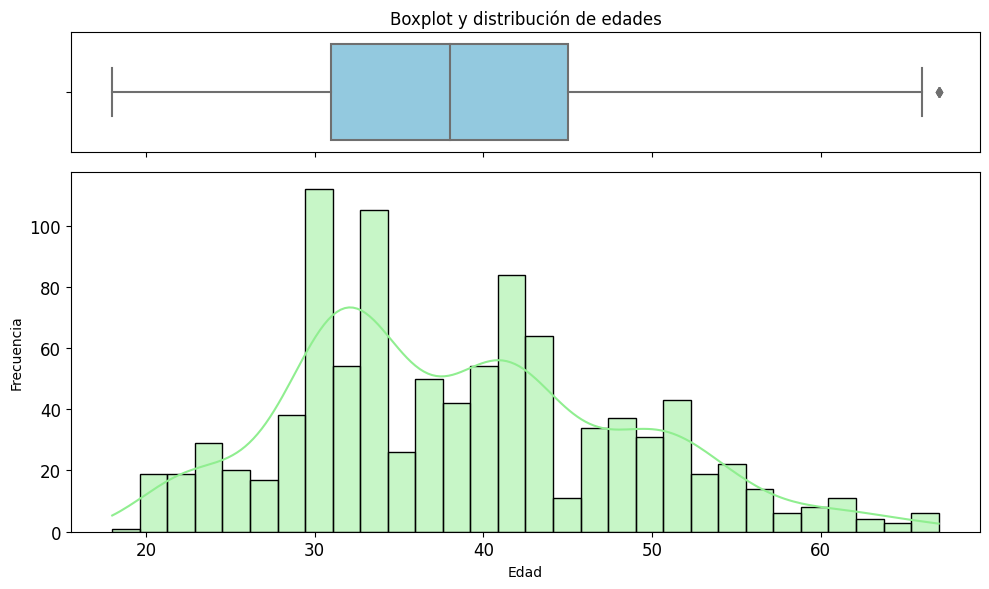

In [12]:
fig, axes = plt.subplots(nrows=2, sharex=True, figsize=(10, 6), height_ratios=[1, 3])

sns.boxplot(data=run_s, x='Edad', ax=axes[0], color='skyblue')
axes[0].set_title('Boxplot y distribución de edades')
axes[0].set(xlabel='')

sns.histplot(data=run_s, x='Edad', bins=30, kde=True, ax=axes[1], color='lightgreen')
axes[1].set_xlabel('Edad')
axes[1].set_ylabel('Frecuencia')

plt.tick_params(labelsize=12)
plt.tight_layout()
plt.show()

# Permutación y muestreo Aleatorio

Una persona lanza un dado 12 veces y obtiene los siguientes resultados:

**6, 6, 6, 5, 6, 6, 6, 6, 5, 6, 6, 6**.

Quiere saber si el dado está cargado para favorecer el número 6.

In [14]:
resultados = np.array([6, 6, 6, 5, 6, 6, 6, 6, 5, 6, 6, 6])

Se desea evaluar si un dado es justo, es decir, si todas las caras tienen igual probabilidad de salir (1/6), ya que la persona lanza el dado 12 veces y obtiene el número 6 en 10 ocasiones, lo cual parece inusual.


Hipótesis estadísticas

- **Hipótesis nula ($ H_0 $)**: El dado es justo.  
  Cada cara tiene probabilidad $ P(i) = \frac{1}{6} $ para $ i = 1, 2, ..., 6$.

- **Hipótesis alternativa ($ H_1 $)**: El dado está cargado a favor del número 6.


Se define el estadístico de prueba como el número de veces que aparece el número 6:

$$
T = \sum_{i=1}^{12} \mathbb{I}(x_i = 6)
$$

Donde $ \mathbb{I}(\cdot)$  es la función indicadora.  En el experimento observado $T_{\text{obs}} = 10$.

In [15]:
seis_observados = np.sum(resultados == 6)
seis_observados

10

Para conocer el comportamiento del estadístico bajo la hipótesis nula $ H_0 $, se utiliza simulación Monte Carlo:

1. Se generan muchas secuencias aleatorias de 12 lanzamientos con un dado justo.
2. En cada secuencia, se cuenta cuántas veces aparece el 6.
3. Se construye la distribución empírica del número de seis bajo $ H_0$.


La función **np.random.choice()** permite seleccionar elementos aleatorios de una secuencia o arreglo, con o sin reemplazo, y con probabilidad uniforme o definida.

 np.random.choice(a, size=None, replace=True, p=None)
 
| Parámetro | Tipo           | Descripción |
|-----------|----------------|-------------|
| `a`       | int o array-like | Si es un entero `n`, se seleccionan valores de `0` a `n-1`. Si es un arreglo o lista, se seleccionan elementos de ese conjunto. |
| `size`    | int o tupla de ints (opcional) | Número de elementos a elegir. Si es `None`, se elige un solo valor. |
| `replace` | bool (opcional, por defecto `True`) | Si `True`, la selección es con reemplazo (pueden repetirse valores). Si `False`, es sin reemplazo. |
| `p`       | array-like de floats (opcional) | Probabilidades asociadas a cada elemento de `a`. Deben sumar 1. Si no se especifica, se usa distribución uniforme. |



In [18]:
caras_justas = [1, 2, 3, 4, 5, 6]
simulaciones = 10000
conteos_seis = []

for _ in range(simulaciones):   # _ se utiliza cuando el valor del índice no se va a usar dentro del bucle.
    tiradas = np.random.choice(caras_justas, size=12, replace=True)
    conteos_seis.append(np.sum(tiradas == 6))

conteos_seis = np.array(conteos_seis)
conteos_seis

array([3, 2, 4, ..., 1, 3, 0])

In [23]:
conteos_seis[:1000]

array([3, 2, 4, 3, 4, 1, 2, 2, 1, 3, 0, 1, 5, 1, 3, 1, 3, 0, 3, 3, 2, 3,
       1, 3, 2, 2, 1, 3, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 1, 2, 3, 0, 3, 0,
       2, 2, 2, 1, 2, 4, 0, 0, 2, 2, 2, 0, 2, 1, 1, 4, 5, 3, 1, 3, 3, 2,
       4, 4, 3, 3, 3, 1, 5, 1, 4, 3, 2, 0, 0, 2, 2, 1, 2, 4, 4, 1, 4, 4,
       2, 4, 2, 4, 2, 1, 3, 0, 2, 2, 1, 2, 3, 0, 2, 4, 2, 3, 0, 1, 4, 3,
       1, 4, 3, 2, 3, 2, 1, 3, 3, 1, 1, 3, 0, 2, 4, 4, 2, 3, 1, 3, 3, 2,
       3, 0, 1, 2, 4, 3, 2, 3, 3, 4, 4, 1, 3, 1, 2, 6, 2, 5, 0, 2, 2, 3,
       3, 2, 3, 2, 3, 5, 3, 2, 1, 3, 3, 1, 2, 1, 2, 1, 1, 0, 1, 0, 4, 2,
       1, 1, 1, 2, 2, 4, 2, 0, 2, 0, 1, 1, 3, 1, 4, 1, 2, 3, 3, 1, 1, 4,
       2, 1, 3, 2, 1, 5, 2, 1, 1, 3, 2, 2, 2, 2, 1, 5, 1, 3, 2, 2, 3, 4,
       4, 0, 1, 4, 4, 0, 1, 1, 0, 3, 3, 2, 0, 3, 4, 3, 1, 2, 2, 1, 3, 3,
       1, 1, 3, 1, 5, 2, 2, 3, 2, 1, 1, 2, 3, 3, 2, 2, 2, 3, 2, 1, 1, 1,
       1, 3, 3, 2, 2, 3, 0, 1, 2, 0, 0, 1, 3, 5, 1, 0, 3, 5, 1, 3, 2, 1,
       1, 3, 0, 4, 2, 1, 3, 2, 2, 0, 2, 2, 3, 2, 1,

El **p-valor** es la probabilidad de obtener un estadístico igual o más extremo que el observado:

$$
\text{p-valor} = P(T \geq T_{\text{obs}} \mid H_0)
$$

Este valor se estima como:

$$
\text{p-valor} \approx \frac{\#\{\text{simulaciones con } T \geq T_{\text{obs}}\}}{\text{\# total de simulaciones}}
$$



#### Decisión

- Si el **p-valor < 0.05**, se rechaza $ H_0$: hay evidencia de que el dado está cargado.
  
- Si el **p-valor >0.05**, no se rechaza $ H_0 $: no hay evidencia suficiente para decir que el dado no es justo.


In [25]:
p_valor = np.mean(conteos_seis >= seis_observados)
p_valor

0.0

In [28]:
ruta = 'https://raw.githubusercontent.com/jamc88/AD-MCMAI/refs/heads/main/Datos/lista_equipos.txt'
df = pd.read_csv(ruta, sep='\t')
df.head()

,RENGLON,MATRICULA,NOMBRE,Unnamed: 3
0,1,22130431,ALBAÑIL PALAFOX MARCELINO ANDRES,NaN
1,2,22230116,ALVARADO GARCIA PRIMO RAFAEL,NaN
2,3,21830530,CANO PAPADAKIS GABRIELA,NaN
3,4,21830107,CARMONA VALENCIA PONCIANO,NaN
4,5,22130096,CASTAÑEDA VELASCO JUAN PABLO,NaN


Tenemos una lista con los nombres de 42 estudiantes. Quieremos formar 6 equipos de 7 alumnos cada uno al azar, sin que el orden original afecte la asignación.

In [29]:
estudiantes = np.array(df['NOMBRE'])

In [30]:
estudiantes

array(['ALBAÑIL PALAFOX MARCELINO ANDRES ',
       'ALVARADO GARCIA PRIMO RAFAEL ', 'CANO PAPADAKIS GABRIELA ',
       'CARMONA VALENCIA PONCIANO ', 'CASTAÑEDA VELASCO JUAN PABLO ',
       'CONTRERAS RAMIREZ MISAEL DE JESUS ',
       'CRESCENCIO HERNANDEZ ALEJANDRO ', 'CRUZ AGUILAR ISAI ',
       'DAVILA SANTAELLA LUIS ', 'GONZALEZ RAMIREZ HUGO ZAIR ',
       'HERNANDEZ BADILLO GABRIELA GUADALUPE ',
       'HERNANDEZ NICOLAS EDGAR DANIEL ', 'HERRERA CANALES EDITH ISABEL ',
       'LOBATO SANTOS ROBERTO CARLOS ', 'LOPEZ ROCHA LUIS ANDRES ',
       'LUCERO GUTIERREZ LUIS MANUEL ', 'LUNA AMADOR IVAN ',
       'MARQUEZ RAMIREZ GERARDO ', 'MARTINEZ SEIN EDUARDO DAVID ',
       'MARTINEZ VALLADARES BRYAN ADAN ', 'MEDINA GARCIA ARANZAZU ',
       'MORALES FARFAN LUIS ANTONIO ', 'MUÑOZ ALVAREZ RAFAEL TADEO ',
       'MUÑOZ ROA CARLOS ALBERTO ', 'PACHECO BASURTO RUBI ESMERALDA ',
       'PENSADO ALARCON CESAR ', 'PEREZ DIAZ ALDO KRISTOFER ',
       'PEREZ LEON VICTOR ', 'PEREZ VICTORIA JOSUE ED

La función **numpy.random.permutation()** genera una permutación aleatoria de una secuencia o de números enteros.

- Devuelve un nuevo arreglo con los elementos reordenados aleatoriamente.

- No modifica el arreglo original.

In [37]:
estudiantes_barajados = np.random.permutation(estudiantes)

In [38]:
equipos = estudiantes_barajados.reshape(6, 7) 

In [39]:
for i, equipo in enumerate(equipos, 1):
    print(f"Equipo {i}: {', '.join(equipo)}")
    print('\n')

Equipo 1: HERNANDEZ NICOLAS EDGAR DANIEL , MARTINEZ VALLADARES BRYAN ADAN , MUÑOZ ROA CARLOS ALBERTO , MARTINEZ SEIN EDUARDO DAVID , PEREZ LEON VICTOR , DAVILA SANTAELLA LUIS , HERRERA CANALES EDITH ISABEL 


Equipo 2: ZAVALA NORIEGA ALDO YAIR , RAMIREZ GARCIA MARCO ANTONIO , VEGA LOPEZ VICTOR HUGO , CARMONA VALENCIA PONCIANO , ZEPEDA GOMEZ KARLA MAGALI, MORALES FARFAN LUIS ANTONIO , PEREZ DIAZ ALDO KRISTOFER 


Equipo 3: ALVARADO GARCIA PRIMO RAFAEL , GONZALEZ RAMIREZ HUGO ZAIR , ROMERO TORRES AMERICA ALEXANDRA , SILVA RODRIGUEZ EDGAR , CANO PAPADAKIS GABRIELA , CASTAÑEDA VELASCO JUAN PABLO , PEREZ VICTORIA JOSUE EDUARDO 


Equipo 4: SANCHEZ ROMERO CARLOS ISAIAS , LUNA AMADOR IVAN , ALBAÑIL PALAFOX MARCELINO ANDRES , PACHECO BASURTO RUBI ESMERALDA , PENSADO ALARCON CESAR , QUINTERO HERNANDEZ CESAR EDUARDO , MUÑOZ ALVAREZ RAFAEL TADEO 


Equipo 5: LUCERO GUTIERREZ LUIS MANUEL , VELASQUEZ SARMIENTO MARIA GUADALUPE , MEDINA GARCIA ARANZAZU , LOBATO SANTOS ROBERTO CARLOS , HERNANDEZ BADIL

# Variables dummy 

Las variables dummy (también llamadas variables indicadoras) son variables que toman típicamente dos valores: 0 y 1. Estos valores indican la pertenencia o no de una observación a una categoría específica dentro de un conjunto de clases.
Por ejemplo, si una variable representa el género y tiene dos categorías ("masculino" y "femenino"), una variable dummy podría tomar el valor 1 para "femenino" y 0 en caso contrario.

Estas variables se utilizan comúnmente en modelos estadísticos y de aprendizaje automático que requieren variables numéricas.

In [41]:
ruta = 'https://raw.githubusercontent.com/jamc88/AD-MCMAI/refs/heads/main/Datos/Corredores.csv'
cor = pd.read_csv(ruta, nrows=15, usecols=['Pais','Corredor'])
cor

,Pais,Corredor
0,GBR,3475
1,NY,13594
2,FRA,12012
3,MI,10236
4,NY,9476
5,NJ,1720
6,CA,15736
7,GBR,10580
8,NED,11957
9,B.C,18933


In [42]:
pd.get_dummies(cor['Pais'], dtype=int)

,B.C,CA,FRA,GBR,GER,ITA,MI,NED,NJ,NY
0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0,1,0
6,0,1,0,0,0,0,0,0,0,0
7,0,0,0,1,0,0,0,0,0,0
8,0,0,0,0,0,0,0,1,0,0
9,1,0,0,0,0,0,0,0,0,0


In [43]:
pd.get_dummies(cor['Pais'], dtype=int).sum()

B.C    1
CA     1
FRA    1
GBR    3
GER    1
ITA    1
MI     1
NED    1
NJ     1
NY     4
dtype: int64

In [50]:
ruta = 'https://raw.githubusercontent.com/jamc88/AD-MCMAI/refs/heads/main/Datos/movies.csv'
movies = pd.read_csv(ruta)

In [51]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


El método **str.get_dummies**  maneja la situación de varias membresías de grupo codificadas como una cadena de texto delimitada.

In [48]:
dummies = movies['genres'].str.get_dummies('|')

In [49]:
dummies

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9738,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9739,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9740,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [52]:
dummies.sum() 

(no genres listed)      34
Action                1828
Adventure             1263
Animation              611
Children               664
Comedy                3756
Crime                 1199
Documentary            440
Drama                 4361
Fantasy                779
Film-Noir               87
Horror                 978
IMAX                   158
Musical                334
Mystery                573
Romance               1596
Sci-Fi                 980
Thriller              1894
War                    382
Western                167
dtype: int64

In [53]:
mov = pd.DataFrame({'cantidad':dummies.sum().sort_values(ascending = False)})
mov

,cantidad
Drama,4361
Comedy,3756
Thriller,1894
Action,1828
Romance,1596
Adventure,1263
Crime,1199
Sci-Fi,980
Horror,978
Fantasy,779


Después, podemos combinar esto con movies añadiendo 
delante un “Genre_” a los nombres de columna 
del dataframe dummies con el método **add_prefix()**:

In [54]:
movies_indic = movies.join(dummies.add_prefix('Genre_'))

In [55]:
movies_indic

,movieId,title,genres,Genre_(no genres listed),Genre_Action,Genre_Adventure,Genre_Animation,Genre_Children,Genre_Comedy,Genre_Crime,...,Genre_Film-Noir,Genre_Horror,Genre_IMAX,Genre_Musical,Genre_Mystery,Genre_Romance,Genre_Sci-Fi,Genre_Thriller,Genre_War,Genre_Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9739,193585,Flint (2017),Drama,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
movies_indic.iloc[7]

movieId                                       8
title                       Tom and Huck (1995)
genres                       Adventure|Children
Genre_(no genres listed)                      0
Genre_Action                                  0
Genre_Adventure                               1
Genre_Animation                               0
Genre_Children                                1
Genre_Comedy                                  0
Genre_Crime                                   0
Genre_Documentary                             0
Genre_Drama                                   0
Genre_Fantasy                                 0
Genre_Film-Noir                               0
Genre_Horror                                  0
Genre_IMAX                                    0
Genre_Musical                                 0
Genre_Mystery                                 0
Genre_Romance                                 0
Genre_Sci-Fi                                  0
Genre_Thriller                          

## Películas por década

In [57]:
movies['title']

0                                Toy Story (1995)
1                                  Jumanji (1995)
2                         Grumpier Old Men (1995)
3                        Waiting to Exhale (1995)
4              Father of the Bride Part II (1995)
                          ...                    
9737    Black Butler: Book of the Atlantic (2017)
9738                 No Game No Life: Zero (2017)
9739                                 Flint (2017)
9740          Bungo Stray Dogs: Dead Apple (2018)
9741          Andrew Dice Clay: Dice Rules (1991)
Name: title, Length: 9742, dtype: object

In [60]:
import re

re.search(r'\((\d{4})\)', movies['title'][0])

<re.Match object; span=(10, 16), match='(1995)'>

Cuando usas re.search(...), el resultado puede ser:
- Un objeto de tipo Match → si se encuentra el patrón.
- None → si no se encuentra el patrón.

In [63]:
import re

A=[]
for val in movies['title']:
    anio = re.search(r'\((\d{4})\)', val)
    if anio:
        A.append(int(anio.group(1)))
    else: A.append(None)


In [62]:
movies['Year'] = A

In [64]:
movies

,movieId,title,genres,Year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995.0
2,3,Grumpier Old Men (1995),Comedy|Romance,1995.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0
4,5,Father of the Bride Part II (1995),Comedy,1995.0
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,2017.0
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,2017.0
9739,193585,Flint (2017),Drama,2017.0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,2018.0


In [66]:
(movies['Year'] // 10) * 10

0       1990.0
1       1990.0
2       1990.0
3       1990.0
4       1990.0
         ...  
9737    2010.0
9738    2010.0
9739    2010.0
9740    2010.0
9741    1990.0
Name: Year, Length: 9742, dtype: float64

In [68]:
movies['decade'] = (movies['Year'] // 10) * 10
movies['decade'] = movies['decade'].astype('Int64')

In [69]:
movies_dec = pd.DataFrame(movies['decade'].value_counts().sort_index())
movies_dec

,count
decade,
1900,3
1910,7
1920,37
1930,136
1940,197
1950,279
1960,401
1970,500
1980,1177


In [71]:
colores = sns.color_palette("viridis", len(movies_dec))

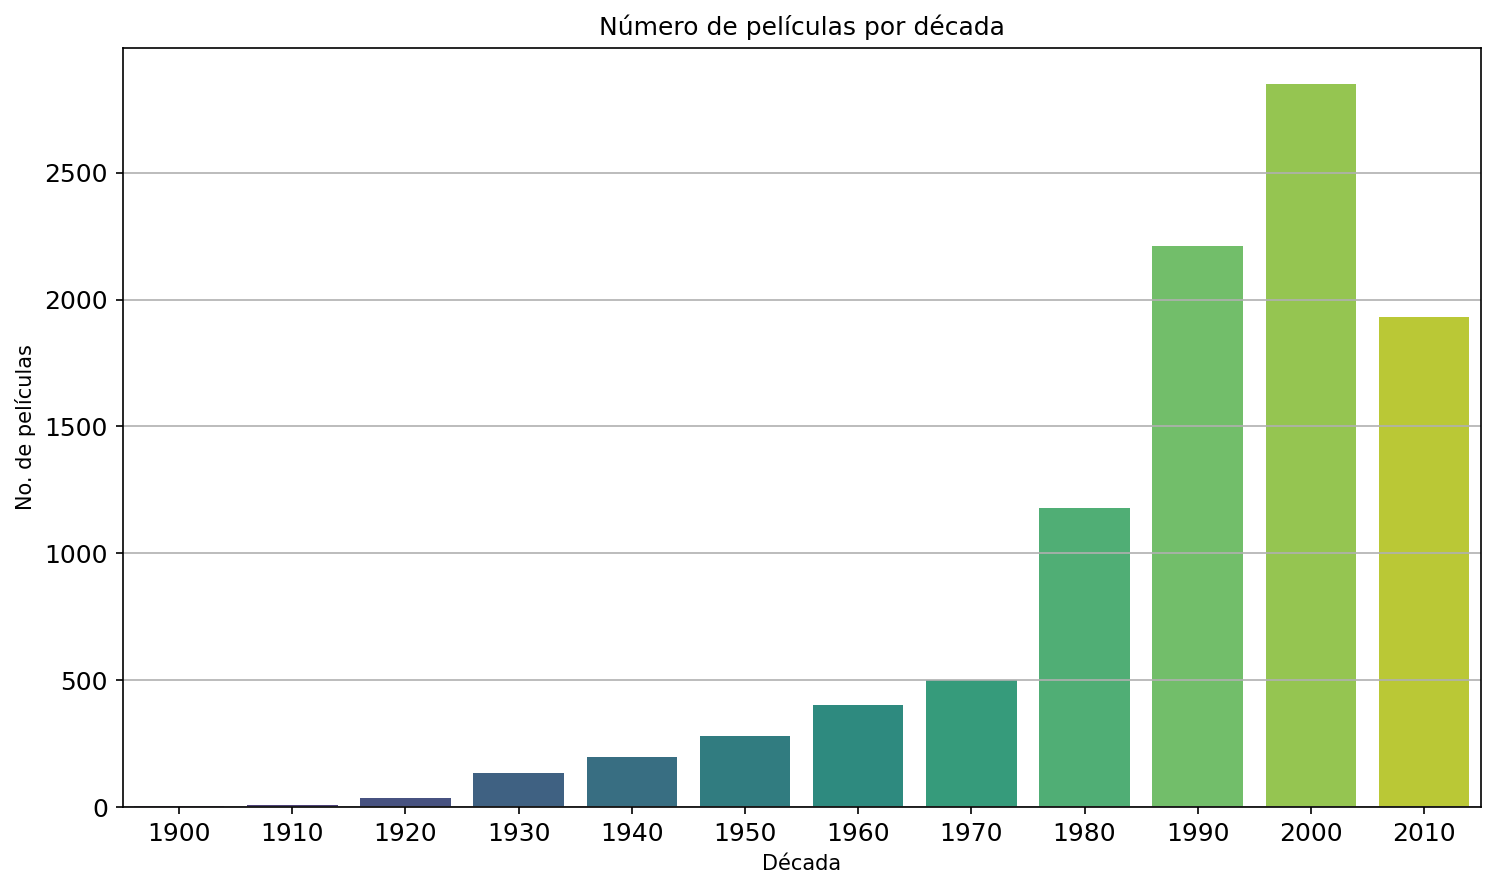

In [72]:
plt.figure(figsize=(10, 6), dpi=150)
sns.barplot(data=movies_dec, x=movies_dec.index, y='count',
            palette=colores)

plt.title('Número de películas por década')
plt.xlabel('Década')
plt.ylabel('No. de películas')
plt.grid(axis='y')
plt.tight_layout()
plt.tick_params(labelsize=12)
plt.show()